# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [1]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import unittest

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 30% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [2]:
# BEGIN CODE HERE
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_VARIABLE)

#END CODE HERE

In [3]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:398
Size of test set:171
Unique classes:2


**Expected output**:  
Size of train set:398  
Size of test set:171  
Unique classes:2  

**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [4]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_VARIABLE)

classifier_gini.fit(X_train,y_train)
classifier_igain.fit(X_train,y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

#END CODE HERE

In [5]:
print("F-Measure Gini:{}".format(f_measure_gini))
print("F-Measure Information Gain:{}".format(f_measure_igain))

F-Measure Gini:0.9528301886792453
F-Measure Information Gain:0.9724770642201834


**Expected output**:  
F-Measure Gini:0.9528301886792453  
F-Measure Information Gain:0.9724770642201834  


**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifier by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to lists.  

In [6]:
# BEGIN CODE HERE
depth = classifier_gini.tree_.max_depth
fscores_train = []
fscores_test = []

for i in range(1,depth+1):
    classifier_gini = DecisionTreeClassifier(criterion="gini", max_depth=i,random_state=RANDOM_VARIABLE)
    classifier_gini.fit(X_train,y_train)
    prediction_gini = classifier_gini.predict(X_test)
    f_measure_gini = f1_score(y_test, prediction_gini)
    fscores_test.append(f_measure_gini)

for i in range(1,depth+1):
    classifier_gini = DecisionTreeClassifier(criterion="gini", max_depth=i,random_state=RANDOM_VARIABLE)
    classifier_gini.fit(X_train,y_train)
    prediction_gini = classifier_gini.predict(X_train)
    f_measure_gini = f1_score(y_train, prediction_gini)
    fscores_train.append(f_measure_gini)

#END CODE HERE

In [7]:
print("Fscores Train:{}".format(fscores_train))
print("Fscores Test:{}".format(fscores_test))


Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]


**Expected output**:  
Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]  
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]



**1.4** Compare the results from the train set with the results from the test set. What do you notice? Explain your findings. How are you going to choose the max_depth of your model?

Παρατηρείται ότι όσο μεγαλώνει το βάθος του δέντρου στην περίπτωση του train set η ακρίβεια όλο και μεγαλώνει μέχρι που φτάνει στο 100%. Ωστόσο η ακρίβεια στα test δεδομένα αυξάνει μέχρι το βάθος 3 όπου παίρνει μέγιστη τιμή ίση με 97.2% και από εκεί και πέρα αρχίζει να πέφτει. Αυτό οφείλεται στο γεγονός ότι το δέντρο αρχίζει να γίνεται πιο περιοριστικό από όσο θα έπρεπε και αρχίζει να κάνει overfit τα δεδομένα. Αυτό φαίνεται από το γεγονός ότι το train σκορ αυξάνεται ενώ το test σκορ μειώνεται. Το καλύτερο βάθος μέγιστο βάθος για αυτό το δέντρο είναι το 3.

## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [8]:
# BEGIN CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
#import seaborn as sns
import time
import urllib.request

income = 'https://raw.githubusercontent.com/iakovidva/ML_course/main/data/income.csv'
filename_income = 'income.csv'
urllib.request.urlretrieve(income, filename_income)
income_train = pd.read_csv("income.csv")

income_test = 'https://raw.githubusercontent.com/iakovidva/ML_course/main/data/income_test.csv'
filename_income_test = 'income_test.csv'
urllib.request.urlretrieve(income_test, filename_income_test)
income_test = pd.read_csv("income_test.csv")


start = time.time()

# Μετά από ελέγχους με τη βοήθεια του seaborn με boxplots και έλεγχος των τιμών για τις αριθμητικές μεταβλητές
# αποφάσισα να βγάλω τα εξής δεδομένα θεωρώντας τα ως ακραίες τιμές. Από τα 32561 παραδείγματα, υπάρχουν μόλις
# 159 με capital-gain>90999, 44 με capital-loss>2500, 146 με hours-per-week>85 και 142 με fnlwgt>6*10^5.
indexNames = income_train[
    (income_train['capital-gain'] > 90999) |
    (income_train['capital-loss'] > 2500) |
    (income_train['hours-per-week'] > 85) |
    (income_train['fnlwgt'] > 6e+5)
    ].index
income_train.drop(indexNames , inplace=True, axis=0)

X_train = income_train.drop("income", axis=1)
y_train = income_train["income"]

X_test = income_test.drop("income", axis=1)
y_test = income_test["income"]


# Συπλήρωση μέσου όρου στα αριθμητικά δεδομένα τα οποία δεν έχουν τιμή και κανονικοποίηση των δεδομένων έπειτα.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Συμπλήρωση με σταθερή τιμή "missing" στα παραδείγματα που λείπει κάποιο κατηγορηματικό χαρακτηριστικό.
# Μετατροπή των κατηγοριματικών χαρακτηριστικών σε oneHotEncode. Η κωδικοποίηση θα μπορούσε να αποφευχθεί στο
# χακακτηριστικό "occupation " καθώς έχει σχετικά πολλές διακριτές τιμές(14), ωστόσο δεν παρατηρήθηκε κάποια
# σημαντική καθυστέρηση στο χρόνο εκτέλεσης.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Εφαρμογή της προεπεξεργασίας των επιλεγμένων δεδομένων στα αντίστοιχα pipelines για αριθμητικές και
# κατηγοριματικές τιμές.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(X_train.select_dtypes(exclude="object").columns)),
        ('cat', categorical_transformer, list(X_train.select_dtypes(include="object").columns)),
    ])

# Τελικό pipeline για προεπεξεργασία δεδομένων και δημιουργία του δένδρου απόφασης.
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier(random_state = RANDOM_VARIABLE))
])

# Grid Search για την εύρεση καλύτερων παραμέτρων σχετικά με το βάθος του δέντρου, το ελάχιστο πλήθος διάσπασης
# και το ελάχιστο πλήθος στοιχείων ανά φύλλο. 
testing_parameters= [{
    'decision_tree__max_depth': [4, 8],
    'decision_tree__min_samples_split': [2,4,8],
    'decision_tree__min_samples_leaf' : [4, 8, 16],
}]

grid_search = GridSearchCV(
    pipe,
    testing_parameters,
    cv=3
)

# Fit του grid_search στα δεδομένα εκπαίδευσης, εύρεση καλύτερου κατηγοριοποιητή, fit αυτού στα δεδομένα και
# predict στα δεδομένα ελέγχου.
grid_search.fit(X_train, y_train)
best_esti = grid_search.best_estimator_
best_esti.fit(X_train,y_train)
preds = best_esti.predict(X_test)

print('Time needed: ', time.time()-start)

# Σχετικά με το σκορ F1 παρατηρείται τεράστια διαφορά αν θέσω ως θετική κλάση την κλάση '<=50Κ' ή την '>50Κ'.
# Αυτό οφείλεται στο γεγονός ότι υπάρχουν τα τριπλάσια παραδείγματα με κλάση την '<=50Κ', κάτι που βοηθάει στο
# να έχω μεγαλύτερη ανάκληση και ακρίβεια. Αντίθετα τα παραδείγματα που ανήκουν στην κλάση '>50Κ' είναι 
# δυσκολότερο να εντοπιστούν, κάτι που θα ήθελε περαιτέρω προσοχή αλλά δεν νομίζω να χρειάζεται σε αυτό το σημείο.

fScore = f1_score(preds,y_test,average='micro')
accScore = accuracy_score(y_test, preds)
print('f1 score: ',fScore)
print('accuracy score: ', accScore)

#END CODE HERE

Time needed:  10.81548261642456
f1 score:  0.8508651648710415
accuracy score:  0.8508651648710415


**2.2** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [9]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)

**3.1** Draw a learning curve for the classifer for the train and test set loaded above.

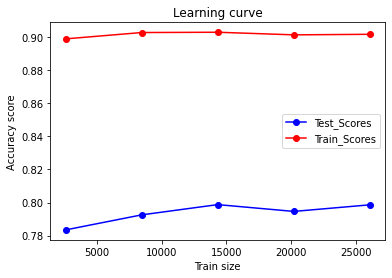

In [10]:
# BEGIN CODE HERE

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn 

def learning_curve(X,y,classifier):
    train_sizes, train_scores, test_scores, _, _ = \
        sklearn.model_selection.learning_curve(classifier, X, y, cv=None, n_jobs=-1,
                       train_sizes= np.linspace(0.1, 1.0, 5),
                       return_times=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",label="Test_Scores")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Train_Scores")
    plt.xlabel("Train size")
    plt.ylabel("Accuracy score")
    plt.title('Learning curve')
    plt.legend(loc="best")
    plt.show()

X, y = X_train, y_train
learning_curve(X, y,classifier)

#END CODE HERE

**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

Παρατηρώ ότι τα train scores παραμένουν πολύ υψηλά καθόλη τη διάρκεια εκπαίδευσης ενώ τα test scores ακολουθούν μια σχεδόν σταθερή πορεία που από ένα σημείο αρχίζουν να πέφτουν κιόλας. Από αυτό συμπαιραίνεται ότι υπάρχει υψηλή διακύμανση στο μοντέλο, δηλαδή κάνει overfit τα δεδομένα εκπαίδευσης. Μία πολύ γρήγορη αλλαγή θα μπορούσε να είναι η αλλαγή της παραμέτρου min_samples_leaf σε έναν αρκετά μεγαλύτερο αριθμό, ώστε να μην μεγαλώνει το βάθος του δένδρου και να αποφύγουμε το overfitting. Με την τιμή min_samples_leaf = 4 το δένδρο φτάνει σε βάθος 39!

**3.3** Implement your solution using the cells below. Report your results and the process you followed. 

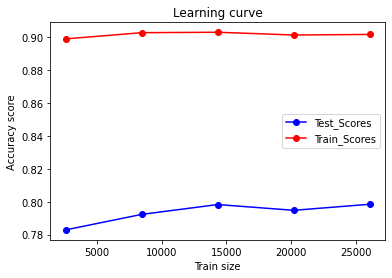

Depth:  39 
Train accuracy:  0.9015386505328461 
Test accuracy:  0.7911851126346718


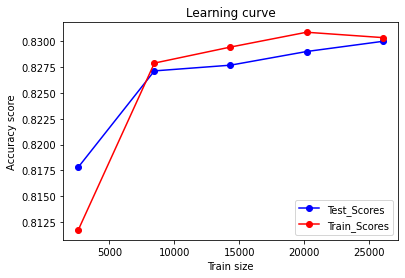

Depth:  7 
Train accuracy:  0.8305641718620436 
Test accuracy:  0.8224616389160954


In [11]:
# BEGIN CODE HERE

classifier.fit(X_train,y_train)
learning_curve(X,y,classifier)
print('Depth: ',classifier.tree_.max_depth, '\nTrain accuracy: ',\
      classifier.score(X_train,y_train),'\nTest accuracy: ',classifier.score(X_test,y_test))

# Με την παράμετρο min_impurity_decrease περιορίζουμε το μέγεθος του δέντρου. Ένας κόμβος θα σπάσει σε αριστερό
# και δεξί παιδί μόνο αν μειώσει την ανομοιογένεια κατά 0.001 αντί για 0 που είναι το default. Περιορίζει δηλαδή
# το σπάσιμο των κόμβων, άρα το ύψος του δέντρου, άρα και το overfit. Με παρόμοιο τρόπο βοηθάει και η επιλογή του
# min_samples_leaf=100, μην αφήνοντας κανένα φύλλο να έχει λιγότερο από 100 δείγματα. Το πρώτο δεν αφήνει έναν 
# κόμβο να σπάσει από πριν, ενώ το δεύτερο σε περίπτωση που το σπάσιμο παραβιάσει το όριο των 100 δειγμάτων 
# σε ένα από τα δύο φύλλα γυρνάει πίσω.
# Έτσι έχουμε την επιθυμητή καμπύλη, η καμπύλη της ακρίβειας στα test δεδομένα ανεβαίνει συνεχώς ενώ από ένα
# σημείο και μετά η ακρίβεια στα train πέφτει, αποφεύγοντας το overfitting. Το μοντέλο πηγαίνει εξίσου καλά και 
# στα train και στα test δεδομένα, το ύψος του δέντρου γίνεται 7 από 39 και η ακρίβεια στα δεδομένα ελέγχου 
# ανεβαίνει κατά 3%, ενώ στα δεδομένα εκπαίδευσης πέφτει κατά 7%.

classifier2 = DecisionTreeClassifier(min_samples_leaf=100, min_impurity_decrease=0.001)
classifier2.fit(X_train,y_train)
learning_curve(X,y,classifier2)
print('Depth: ',classifier2.tree_.max_depth, '\nTrain accuracy: ',\
      classifier2.score(X_train,y_train),'\nTest accuracy: ',classifier2.score(X_test,y_test))
#END CODE HERE